**A: Добавление пустой ячейки сверху\
B: Добавление пустой ячейки снизу\
DD: Удаления ячейки\
C: Копирование ячеек\
X: Вырезание ячеек\
V: Вставка ячеек**

**Создайте стековую столбчатую диаграмму, используя данные из файла CSV, загруженного с Kaggle, для отображения продаж первых 8 видеоигр по регионам.\
https://www.kaggle.com/datasets/gregorut/videogamesales?resource=download**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загруим данные с Kaggle и прочитаем файл CSV 
# Считанные данные из файла CSV загрузим в переменную data с помощью pandas
data = pd.read_csv("vgsales.csv")

# Отобразим датафрейм

In [5]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [6]:
data.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# Извлечем данные о продажах первых 8 видеоигр по регионам

In [9]:
top_games = data.head(8)

In [10]:
# Создаем список с названиями столбцов, представляющих регионы продаж
sales_regions = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

In [11]:
# Извлекаем имена игр и сохраняем их в переменную game_names
game_names = top_games["Name"].values

In [12]:
# Извлекаем данные о продажах по регионам, транспонируем и сохраняем в переменную sales_data
sales_data = top_games[sales_regions].values.T

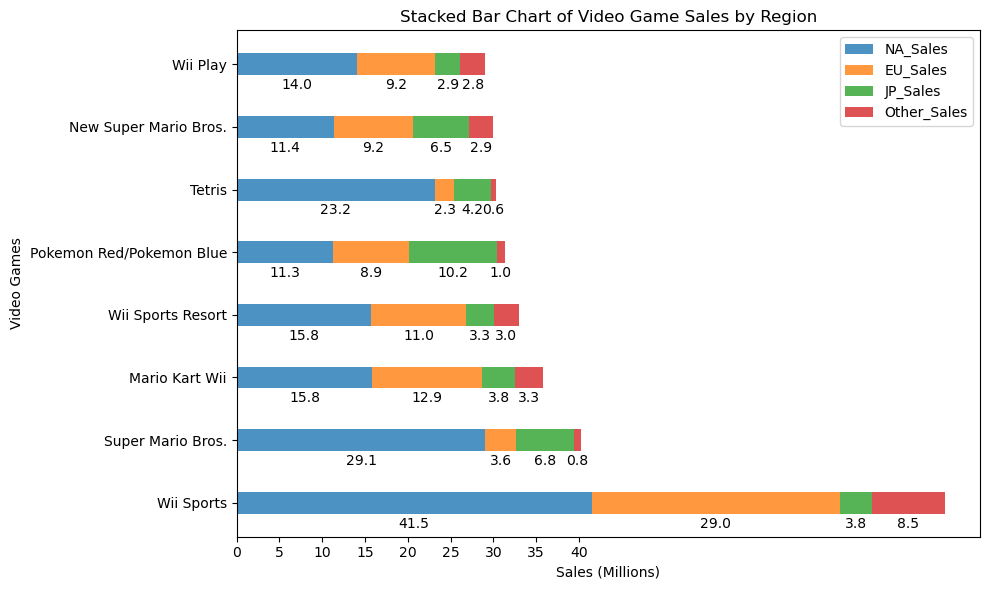

In [18]:
# Создаем объекты Figure и Axes с помощью функции subplots()
fig, ax = plt.subplots(figsize=(10, 6))

# Задаем высоту столбцов
bar_height = 0.35

# Задаем значение прозрачности столбцов
opacity = 0.8

# Создаем массив индексов для игр на оси Y
ind = np.arange(len(game_names))

# Цикл для отрисовки столбцов каждого региона
for i in range(len(sales_regions)):
    # Рисуем столбцы для каждого региона, используя barh()
    if i == 0:
        rects = plt.barh(ind, sales_data[i], bar_height, alpha=opacity)
    else:
        rects = plt.barh(ind, sales_data[i], bar_height, alpha=opacity, left=sales_data[:i].sum(axis=0))
    # Цикл для добавления подписей к столбцам
    for rect in rects:
        width = rect.get_width() # Получаем ширину столбца (значение продаж)
        # Добавляем подпись со значением продаж над столбцом
        ax.annotate(
            f"{width:.1f}",  # Форматирование текста подписи с округлением значения до одного знака после запятой
            xy=(rect.get_x() + width / 2, rect.get_y() + rect.get_height() / 2),  # Координаты (x, y) центра столбца
            xytext=(0, -20),  # Смещение текста подписи относительно координат (x, y); в данном случае смещение вниз на 20 пунктов
            textcoords="offset points",  # Система координат для смещения текста; "offset points" означает смещение в пунктах
            ha="center",  # Горизонтальное выравнивание текста подписи; "center" означает выравнивание по центру столбца
            va="bottom",  # Вертикальное выравнивание текста подписи; "bottom" означает выравнивание по нижнему краю текста
        )
        
# Добавляем подпись к оси X
plt.xlabel("Sales (Millions)")

# Добавляем подпись к оси Y
plt.ylabel("Video Games")

# Добавляем заголовок графика
plt.title("Stacked Bar Chart of Video Game Sales by Region")


plt.xticks(np.arange(0, 45, 5)) # Задаем метки делений на оси X

plt.yticks(ind, game_names)  # Задаем метки делений на оси Y, соответствующие именам игр

plt.legend(sales_regions, loc="upper right") # Добавляем легенду графика с названиями регионов продаж и указываем расположение в правом верхнем углу

plt.tight_layout() # Оптимизируем расположение элементов графика для лучшего отображения


plt.show()